### **페르소나**

- **이름**: Alex Kim
- **직업**: 영화 제작사 마케팅 팀장
- **목표**: 시장 트렌드를 분석하여 관객들이 원하는 영화 장르와 특성을 파악하고, 투자 대비 수익성이 높은 영화 제작 아이디어를 도출하고자 함.
- **관심사**:
    - 어떤 영화가 최근 트렌드에 부합하는지?
    - 흥행 성공 요인과 관련된 데이터 패턴 발견
    - 관객들이 선호하는 장르, 러닝타임, 배우 등 구체적인 요소 분석
    - 영화 제작 비용 대비 수익성을 극대화할 수 있는 전략



In [236]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FuncFormatter


font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows의 맑은 고딕 폰트 경로
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

df = pd.read_csv('Data/complete.csv')
# 정보 확인

print(df.info())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10700 non-null  int64  
 1   Title                  10700 non-null  object 
 2   Year                   10700 non-null  int64  
 3   Duration               10700 non-null  float64
 4   MPA                    10700 non-null  object 
 5   Rating                 10700 non-null  float64
 6   Votes                  10700 non-null  float64
 7   budget                 10700 non-null  float64
 8   grossWorldWide         10700 non-null  float64
 9   gross_US_Canada        10700 non-null  float64
 10  opening_weekend_Gross  10700 non-null  float64
 11  directors              10700 non-null  object 
 12  writers                10700 non-null  object 
 13  stars                  10700 non-null  object 
 14  genres                 10390 non-null  object 
 15  co

### **1. 시장 트렌드 분석**

- 최근 몇 년간 가장 높은 수익을 올린 영화 장르는 무엇인가요?
- 연도별 IMDb 평점 상위 영화들의 특징(장르, 러닝타임, 주요 배우)은 무엇인가요?
- 특정 장르의 영화 흥행 여부(수익성)는 어떻게 변화했나요?
- 영화 상영 시간(Duration)이 관객 선호도(Rating)와 어떤 관계를 가지나요?




In [237]:
# 1. 

# 연도별로 장르 별 총 수익 계산산
genre_earnings = df.groupby(['Year','Category'])['grossWorldWide'].sum().reset_index()

# 최신 연도 찾기 
lastest_year = genre_earnings['Year'].max()

# 최신 연도에서 가장 높은 수익을 올린 영화 장르 추출
recent_earnings =genre_earnings[genre_earnings['Year']==lastest_year]

# 최근 연도에서 장르별 총 수익 추출
top_10_genres = recent_earnings.sort_values('grossWorldWide', ascending=False).head(10)


print(top_10_genres)

     Year   Category  grossWorldWide
176  2024    Fantasy    4.350808e+09
173  2024     Comedy    3.483058e+09
171  2024     Action    3.353946e+09
175  2024       Epic    3.179026e+09
177  2024     Horror    1.557896e+09
174  2024      Drama    8.977298e+08
179  2024    Romance    4.598866e+08
178  2024      Other    4.366186e+08
172  2024  Adventure    6.291574e+07


In [238]:
top_movies = df.loc[df.groupby('Year')['Rating'].idxmax()]

# 상위 영화들의 장르, 러닝타임, 주요 배우를 추출
top_movies_characters = top_movies[['Year', 'Title', 'Category', 'Duration', 'Rating', 'stars']]

# 결과 확인
print(top_movies_characters)


       Year                                              Title Category  \
491    2005           492. Sacred Stage: The Mariinsky Theater    Other   
921    2006                           422. Dare Not Walk Alone    Other   
1138   2007                                         139. U2 3D    Other   
1550   2008                                 1. The Dark Knight     Epic   
2527   2009                       378. The Legend of Pale Male    Other   
2705   2010                                       6. Inception     Epic   
3339   2011                              140. The Intouchables    Other   
4189   2012                          490. This Binary Universe    Other   
4227   2013                        28. The Wolf of Wall Street     Epic   
5128   2014                                 379. Veil of Tears    Drama   
5500   2015                                        251. Hamlet    Drama   
6096   2016                               347. Apparition Hill    Other   
6736   2017  487. PGS: In

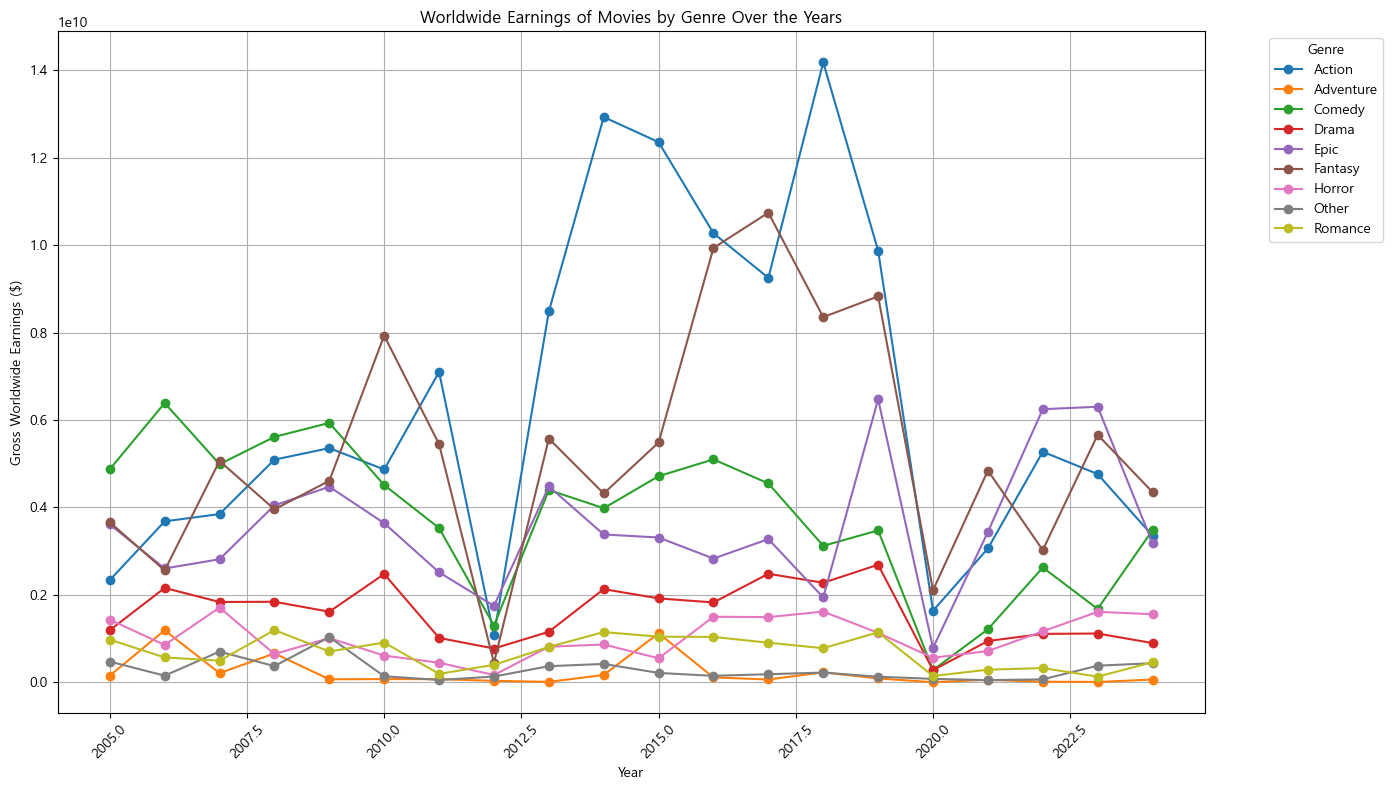

In [239]:
genre_earnings = df.groupby(['Year', 'Category'])['grossWorldWide'].sum().reset_index()

# 모든 장르에 대해 시각화
plt.figure(figsize=(14, 8))  # 넓은 형태의 그림 크기 지정

# 각 장르에 대해 연도별 수익을 시각화
for genre in genre_earnings['Category'].unique():
    genre_data = genre_earnings[genre_earnings['Category'] == genre]
    plt.plot(genre_data['Year'], genre_data['grossWorldWide'], marker='o', label=genre)

plt.xlabel('Year')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Worldwide Earnings of Movies by Genre Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')  # 범례를 오른쪽에 배치
plt.grid(True)
plt.xticks(rotation=45)  # 연도 표시가 겹치지 않도록 회전
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

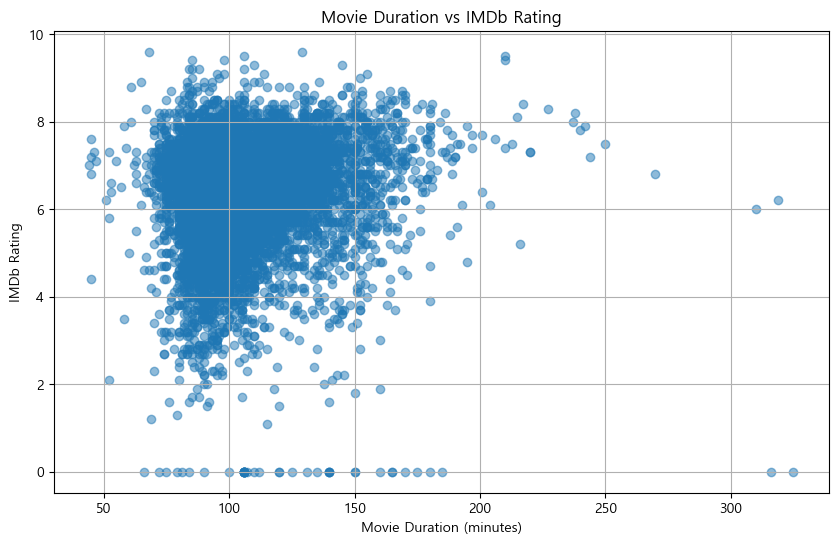

Correlation between Duration and Rating: 0.14


In [240]:
# 4. 

# 'Duration'과 'Rating'의 관계를 시각화 (산점도)
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration'], df['Rating'], alpha=0.5)
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.title('Movie Duration vs IMDb Rating')
plt.grid(True)
plt.show()

#'Duration'과 'Rating'의 상관계수 계산
correlation = df['Duration'].corr(df['Rating'])
print(f"Correlation between Duration and Rating: {correlation:.2f}")


# 만약 값이 1에 가까우면 상영 시간이 길어질수록 평점이 높아지는 경향이 있음을 의미하며, 
# -1에 가까우면 반대로 상영 시간이 길어질수록 평점이 낮아지는 경향이 있음을 나타냅니다. 
# 0에 가까운 값은 두 변수 간에 관계가 없다는 것을 의미합니다.

### **2. 흥행 요소 분석**

- 높은 수익을 낸 영화의 공통적인 요소(감독, 작가, 주연배우)는 무엇인가요?
- IMDb 평점(Rating)과 투표 수(Votes) 간 상관관계는 어떤가요?
- 개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide)과 어떤 연관이 있나요?



In [241]:
# 1. 

# 상위 10개 영화 추출 (가장 높은 수익을 낸 영화 10개)
top_10_movies = df.nlargest(10, 'grossWorldWide')

# 감독, 작가, 주연배우 정보 확인
top_10_movies_elements = top_10_movies[['Title', 'directors', 'writers', 'stars', 'grossWorldWide']]

# 1. 감독, 작가, 주연배우를 분리하여 리스트로 만들어 빈도수 분석
directors_list = []
writers_list = []
stars_list = []

for index, row in top_10_movies.iterrows():
    # 감독, 작가, 주연배우를 분리하여 추가
    if isinstance(row['directors'], str):
        directors_list.extend(row['directors'].split(','))
    if isinstance(row['writers'], str):
        writers_list.extend(row['writers'].split(','))
    if isinstance(row['stars'], str):
        stars_list.extend(row['stars'].split(','))

# 2. 빈도수 분석 (Counter 사용)
directors_count = Counter([director.strip() for director in directors_list])
writers_count = Counter([writer.strip() for writer in writers_list])
stars_count = Counter([star.strip() for star in stars_list])

# 3. 상위 5명의 감독, 작가, 주연배우 확인
top_directors = directors_count.most_common(5)
top_writers = writers_count.most_common(5)
top_stars = stars_count.most_common(5)

# 결과 출력
print("Top 10 Movies with Highest Gross Worldwide Earnings:")
print(top_10_movies_elements[['Title', 'directors', 'writers', 'stars', 'grossWorldWide']])

print("\nTop 5 Most Common Directors:")
for director, count in top_directors:
    print(f"{director}: {count}")

print("\nTop 5 Most Common Writers:")
for writer, count in top_writers:
    print(f"{writer}: {count}")

print("\nTop 5 Most Common Stars:")
for star, count in top_stars:
    print(f"{star}: {count}")

Top 10 Movies with Highest Gross Worldwide Earnings:
                                               Title  \
2150                                       1. Avatar   
7300                            1. Avengers: Endgame   
8951                     2. Avatar: The Way of Water   
5250   1. Star Wars: Episode VII - The Force Awakens   
6801                       2. Avengers: Infinity War   
8450                      1. Spider-Man: No Way Home   
10100                                1. Inside Out 2   
5251                               2. Jurassic World   
7301                                2. The Lion King   
3700                                 1. The Avengers   

                       directors  \
2150               James Cameron   
7300   Anthony Russo,  Joe Russo   
8951               James Cameron   
5250                 J.J. Abrams   
6801   Anthony Russo,  Joe Russo   
8450                   Jon Watts   
10100                Kelsey Mann   
5251             Colin Trevorrow   
7301  

In [242]:
# 2.

correlation = df['Rating'].corr(df['Votes'])

# 결과 출력
print(f"평점과 투표수의 상관관계: {correlation:.2f}")

평점과 투표수의 상관관계: 0.22


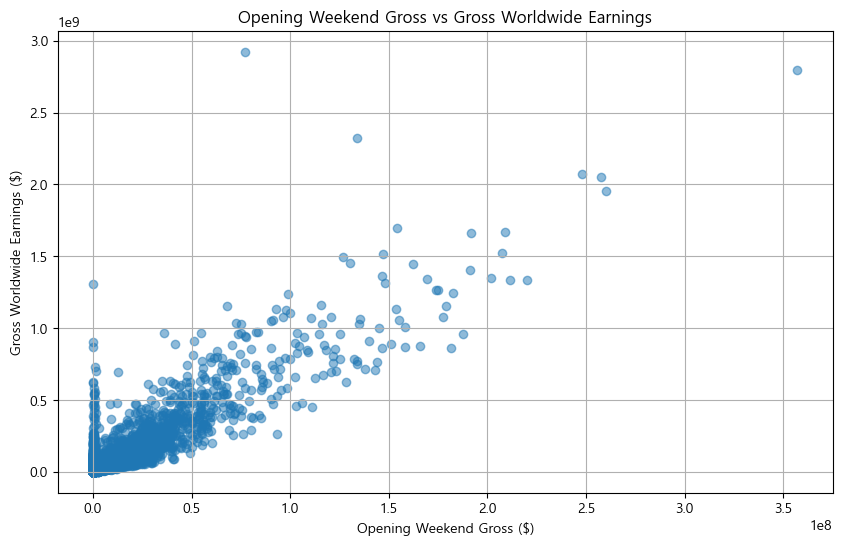

개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관관계 : 0.90


In [243]:
# 3.

# 개봉 주 수익(Opening_weekend_Gross)과 전체 흥행(GrossWorldwide)의 관계
# 'opening_weekend_Gross'와 'grossWorldWide'의 관계 시각화 (산점도)
df['opening_weekend_Gross'] = pd.to_numeric(df['opening_weekend_Gross'], errors='coerce')  # 'opening_weekend_Gross' 컬럼을 숫자형으로 변환

plt.figure(figsize=(10, 6))
plt.scatter(df['opening_weekend_Gross'], df['grossWorldWide'], alpha=0.5)
plt.xlabel('Opening Weekend Gross ($)')
plt.ylabel('Gross Worldwide Earnings ($)')
plt.title('Opening Weekend Gross vs Gross Worldwide Earnings')
plt.grid(True)
plt.show()

# 'opening_weekend_Gross'와 'grossWorldWide'의 상관계수 계산

# 만약 상관계수가 0.85라면, 
# 개봉 주 수익이 높을수록 전체 수익도 높은 경향이 있다고 해석할 수 있습니다.
#  반대로 0.1이라면 관계가 매우 약하다는 뜻입니다.
opening_weekend_correlation = df['opening_weekend_Gross'].corr(df['grossWorldWide'])
print(f"개봉 주 수익(Opening_weekend_Gross)이 전체 흥행(GrossWorldwide) 상관관계 : {opening_weekend_correlation:.2f}")

### **3. 관객 선호도 분석**

- 특정 MPA 등급(e.g., PG, R)에 따른 관객 선호도(Rating) 차이가 있나요?
- 상위 평점 영화들의 주요 언어(Languages)는 무엇인가요?
- 영화 촬영지(Filming_locations)가 흥행 성과에 미치는 영향은 무엇인가요?


In [244]:
# 1. 특정 MPA 등급에 따른 관객 선호도(Rating) 차이
mpa_avg_rating = df.groupby('MPA')['Rating'].mean().reset_index()

# 출력: MPA 등급별 평균 Rating 확인
print("MPA 등급별 평균 Rating:")
print(mpa_avg_rating)


MPA 등급별 평균 Rating:
          MPA    Rating
0         13+  6.066667
1         16+  6.175000
2         18+  5.966667
3    Approved  7.733333
4           G  6.407216
5           M  7.300000
6       MA-17  7.200000
7       NC-17  6.345455
8   Not Rated  6.407627
9          PG  6.312344
10      PG-13  6.303789
11          R  6.290678
12      TV-14  6.386087
13       TV-G  6.520000
14      TV-MA  6.243787
15      TV-PG  6.463768
16       TV-Y  6.300000
17      TV-Y7  6.120000
18   TV-Y7-FV  7.100000
19    Unrated  6.632967


In [245]:
# 2. 상위 평점 영화들의 주요 언어(Languages)
# IMDb 평점이 상위 10개 영화 추출
top_rated_movies = df.nlargest(10, 'Rating')

# 상위 평점 영화들의 주요 언어(Languages) 분석
top_rated_languages = top_rated_movies['Languages'].value_counts().reset_index()
top_rated_languages.columns = ['Language', 'Count']

# 출력: 상위 평점 영화들의 주요 언어
print("\n상위 평점 영화들의 주요 언어:")
print(top_rated_languages)


상위 평점 영화들의 주요 언어:
           Language  Count
0           English      6
1            Korean      2
2  Unknown Language      1
3          Japanese      1


In [246]:
# 3. 영화 촬영지(Filming_locations)가 흥행 성과에 미치는 영향
# 'Filming_locations'에 대한 영화의 평균 'grossWorldWide' 수익
filming_location_avg_earnings = df.groupby('filming_locations')['grossWorldWide'].mean().reset_index()

filming_location_avg_earnings_sorted = filming_location_avg_earnings.sort_values(by='grossWorldWide', ascending=False).reset_index(drop=True)

# 출력: 촬영지별 평균 'grossWorldWide' 수익
print("\n영화 촬영지별 평균 흥행 성과:")
print(filming_location_avg_earnings_sorted.head(5))




영화 촬영지별 평균 흥행 성과:
                                   filming_locations  grossWorldWide
0  Durham Cathedral,  The College,  Durham,  Coun...    2.799439e+09
1    Stone Street Studios,  Wellington,  New Zealand    2.320250e+09
2           Skellig Michael,  County Kerry,  Ireland    2.071310e+09
3  Cockburn Street,  Edinburgh,  City of Edinburg...    2.052415e+09
4  Kualoa Ranch - 49560 Kamehameha Highway,  Kaaa...    1.671537e+09


### **4. 지역별 분석**

- 북미(North America) 흥행 수익(Gross_US_Canada)과 글로벌 흥행 수익(GrossWorldwide) 간 비율은 어떻게 되나요?
- 제작 국가(Countries_origin)에 따른 흥행 성과는 어떤 차이가 있나요?
- 특정 국가나 언어에서 제작된 영화가 글로벌 흥행(GrossWorldwide)에서 차지하는 비율은?



In [247]:
df['north_america_ratio'] = df['gross_US_Canada'] / df['grossWorldWide']
print("\n북미 흥행 수익과 글로벌 흥행 수익 간의 비율:")
print(df[['Title', 'north_america_ratio']].head())


북미 흥행 수익과 글로벌 흥행 수익 간의 비율:
                                               Title  north_america_ratio
0    1. Star Wars: Episode III - Revenge of the Sith             0.447358
1  2. The Chronicles of Narnia: The Lion,  the Wi...             0.391551
2             3. Harry Potter and the Goblet of Fire             0.323655
3                               4. War of the Worlds             0.387963
4                                       5. King Kong             0.391592


In [248]:
# 2. 제작 국가(Countries_origin)에 따른 흥행 성과 분석

# 국가별 평균 글로벌 수익 계산
country_avg_earnings = df.groupby('countries_origin')['grossWorldWide'].mean().reset_index()

# 상위 10개 국가 출력 (글로벌 수익 순)
country_avg_earnings_sorted = country_avg_earnings.sort_values(by='grossWorldWide', ascending=False).head(10)
print("\n제작 국가별 평균 글로벌 수익:")
print(country_avg_earnings_sorted)


제작 국가별 평균 글로벌 수익:
                                       countries_origin  grossWorldWide
1732             United States,  United Kingdom,  Kenya    1.662021e+09
1409  United States,  China,  Japan,  Canada,  Unite...    1.515342e+09
1738  United States,  United Kingdom,  New Zealand, ...    1.338074e+09
1485              United States,  Germany,  Puerto Rico    1.155046e+09
1423  United States,  Czech Republic,  Australia,  C...    1.132705e+09
1506  United States,  Hong Kong,  Cambodia,  United ...    1.123794e+09
1744  United States,  United Kingdom,  Singapore,  C...    1.054304e+09
1624                             United States,  Norway    1.053709e+09
1457                     United States,  France,  Japan    1.034800e+09
1553  United States,  Italy,  Canada,  Japan,  Unite...    1.025468e+09



각 국가가 글로벌 흥행에서 차지하는 비율:
United States: 89.59%
Italy: 2.84%
Switzerland: 0.42%
Thailand: 0.84%
United Kingdom: 24.96%
New Zealand: 2.63%
Germany: 6.06%
Canada: 17.63%
France: 7.37%
Spain: 1.94%
Serbia and Montenegro: 0.02%
United Arab Emirates: 0.97%
Morocco: 0.93%
Czech Republic: 1.29%
Australia: 5.86%
Kenya: 0.38%
Japan: 9.30%
Brazil: 0.35%
Luxembourg: 0.08%
Pakistan: 0.02%
Romania: 0.07%
Hong Kong: 4.12%
India: 4.62%
Mexico: 1.66%
Austria: 0.47%
South Africa: 0.27%
China: 12.23%
Isle of Man: 0.01%
Occupied Palestinian Territory: 0.00%
Netherlands: 0.50%
Israel: 0.03%
Denmark: 0.79%
Dominican Republic: 0.02%
Belgium: 0.93%
Ireland: 0.45%
Norway: 0.88%
South Korea: 1.91%
Russia: 0.47%
Philippines: 0.09%
Hungary: 1.27%
Argentina: 0.20%
Taiwan: 0.42%
Mongolia: 0.00%
Tunisia: 0.01%
Iran: 0.01%
Kazakhstan: 0.01%
Sweden: 0.36%
Turkey: 0.10%
Iceland: 0.55%
Greece: 0.02%
Slovakia: 0.09%
Cameroon: 0.00%
Portugal: 0.04%
Bolivia: 0.00%
Uruguay: 0.04%
Puerto Rico: 0.27%
Malta: 0.57%
Bulgaria: 0.

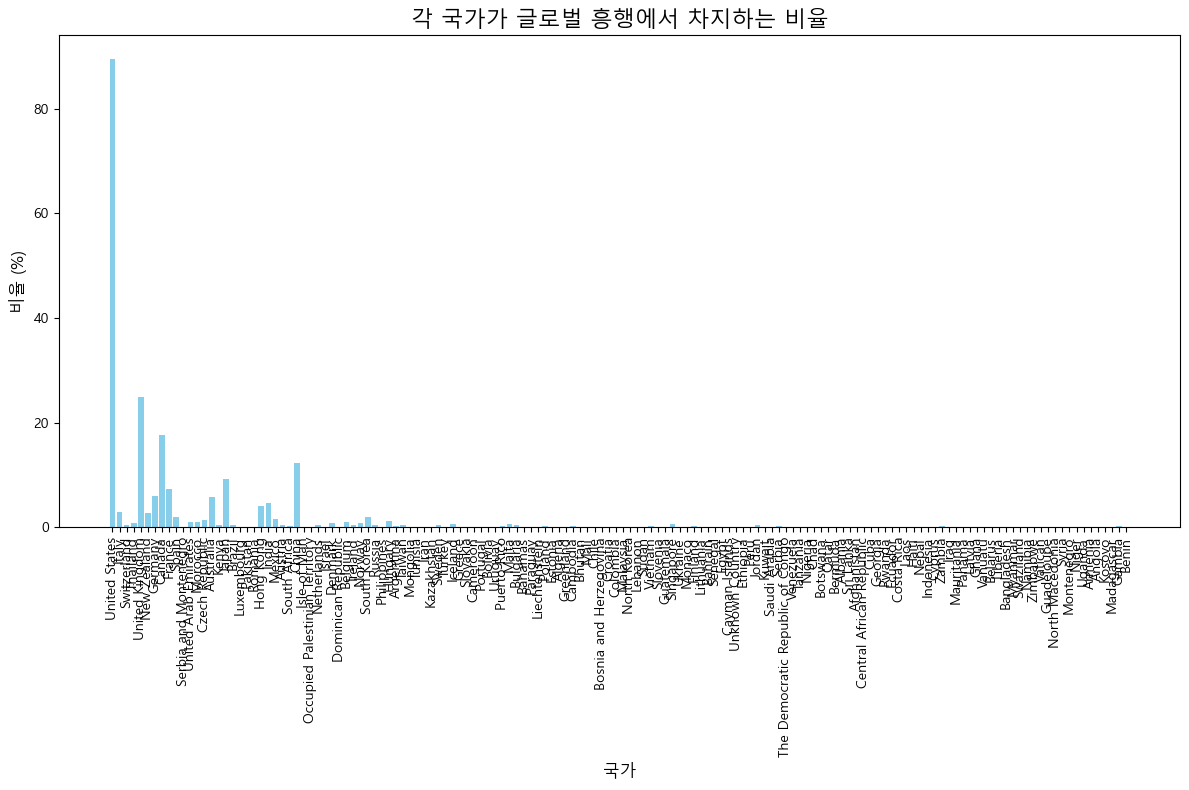

In [249]:
# 전체 글로벌 수익 계산
total_global_earnings = df['grossWorldWide'].sum()

# 국가별 글로벌 수익 비율 계산
country_earnings_percentage = {}

# 각 영화에 대해 반복문을 사용하여 국가별 비율 계산
for index, row in df.iterrows():
    countries_list = [country.strip() for country in row['countries_origin'].split(',')]
    
    for country in countries_list:
        # 이미 해당 국가의 수익 비율이 계산되었으면 추가하지 않음
        if country not in country_earnings_percentage:
            # 특정 국가에 해당하는 영화들의 수익 계산
            country_movies = df[df['countries_origin'].str.contains(country, case=False, na=False)]
            country_total_earnings = country_movies['grossWorldWide'].sum()
            
            # 국가별 글로벌 수익 비율 계산
            country_percentage = (country_total_earnings / total_global_earnings) * 100
            
            # 결과를 딕셔너리에 저장
            country_earnings_percentage[country] = country_percentage

# 결과 출력: 각 국가별 글로벌 수익 비율
print("\n각 국가가 글로벌 흥행에서 차지하는 비율:")
for country, percentage in country_earnings_percentage.items():
    print(f"{country}: {percentage:.2f}%")


plt.figure(figsize=(12, 8))  # 그래프 크기 설정
plt.bar(country_earnings_percentage.keys(), country_earnings_percentage.values(), color='skyblue')

# x축 레이블 회전 (이름 겹침 방지)
plt.xticks(rotation=90)

# 제목과 레이블 설정
plt.title('각 국가가 글로벌 흥행에서 차지하는 비율', fontsize=16)
plt.xlabel('국가', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)

# 그래프 출력
plt.tight_layout()  # 레이블 겹침 방지
plt.show()

### **EDA로 시각화할 주요 관계**

1. **장르별 평균 제작비 vs 수익 시각화**
    - 장르가 수익성에 미치는 영향을 막대 그래프로 표현
2. **연도별 상위 평점 영화 개수**
    - 시간에 따른 트렌드를 꺾은선 그래프로 나타냄
3. **러닝타임(Duration) vs 평점(Rating)**
    - 러닝타임과 평점 간의 관계를 산점도로 시각화
4. **제작비(Budget)와 글로벌 수익(GrossWorldwide)**
    - 제작비 대비 수익성을 산점도 및 회귀선을 이용하여 표현



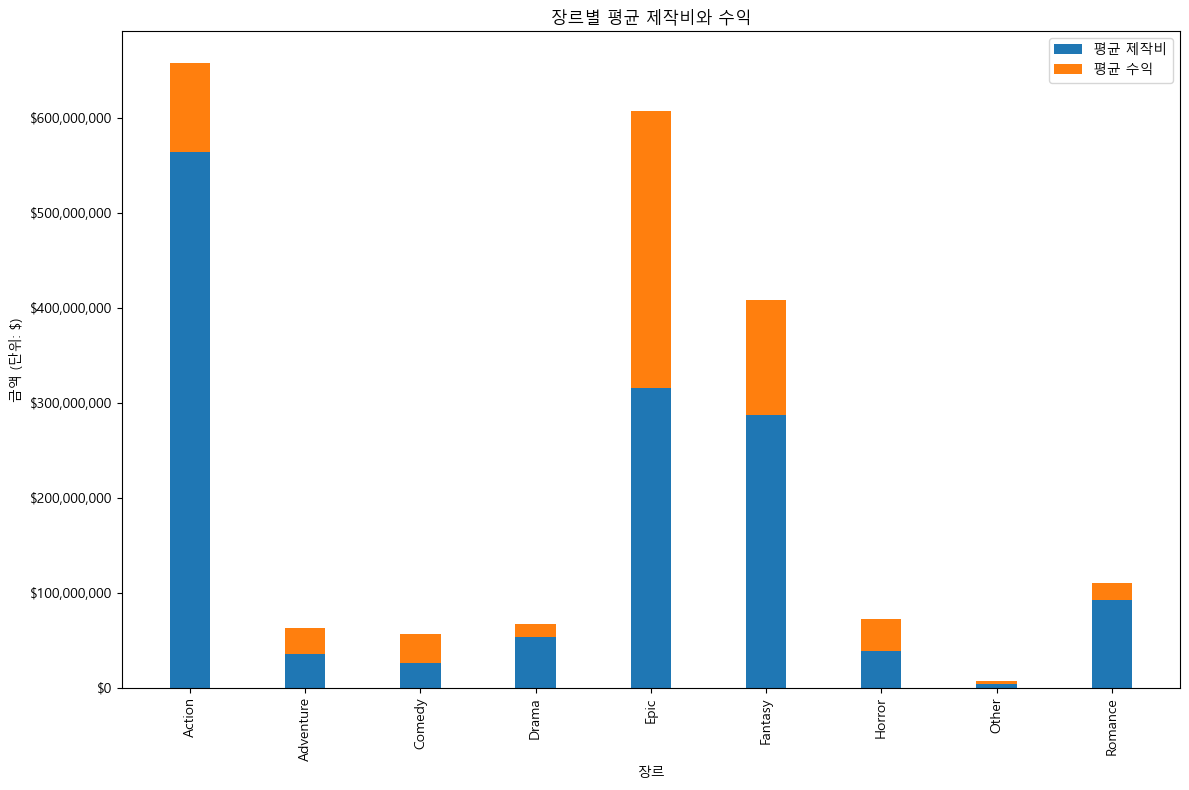

In [250]:
# 장르별 평균 제작비와 평균 수익 계산
genre_avg_budget = df.groupby('Category')['budget'].mean()
genre_avg_gross = df.groupby('Category')['grossWorldWide'].mean()

# 천 단위 구분 및 통화 기호 추가 함수
def currency(x, pos):
    return f"${x:,.0f}"

# 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 8))

width = 0.35  # 막대 너비
ax.bar(genre_avg_budget.index, genre_avg_budget, width, label='평균 제작비')
ax.bar(genre_avg_gross.index, genre_avg_gross, width, label='평균 수익', bottom=genre_avg_budget)

ax.set_xlabel('장르')
ax.set_ylabel('금액 (단위: $)')
ax.set_title('장르별 평균 제작비와 수익')
ax.legend()

# x축 레이블 회전
plt.xticks(rotation=90)

# y축과 x축에 천 단위 구분과 통화 기호 적용
ax.yaxis.set_major_formatter(FuncFormatter(currency))

plt.tight_layout()
plt.show()

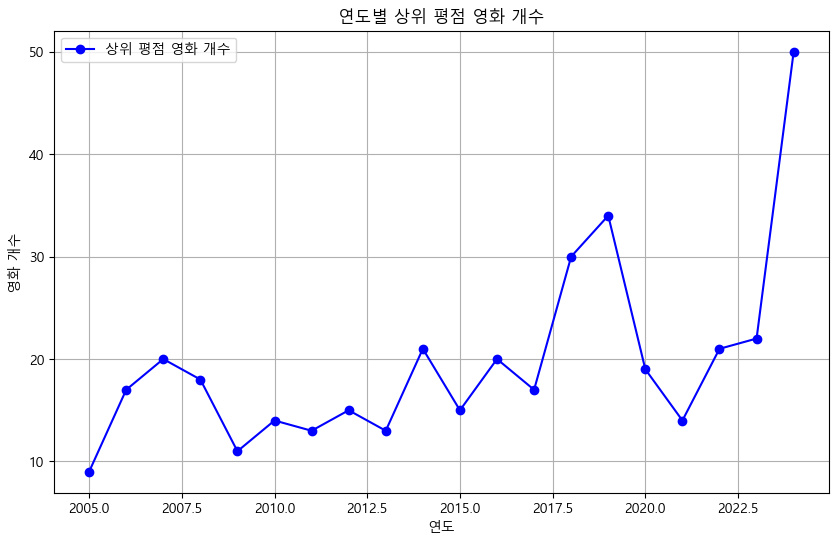

In [251]:
# IMDb 평점이 높은 영화만 필터링 (예: 평점 8.0 이상)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
top_rated_movies = df[df['Rating'] >= 8.0]

# 연도별 상위 평점 영화 개수 계산
top_rated_by_year = top_rated_movies.groupby('Year')['Title'].count()

# 꺾은선 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(top_rated_by_year.index, top_rated_by_year.values, marker='o', color='b', label='상위 평점 영화 개수')
plt.xlabel('연도')
plt.ylabel('영화 개수')
plt.title('연도별 상위 평점 영화 개수')
plt.legend()
plt.grid(True)
plt.show()

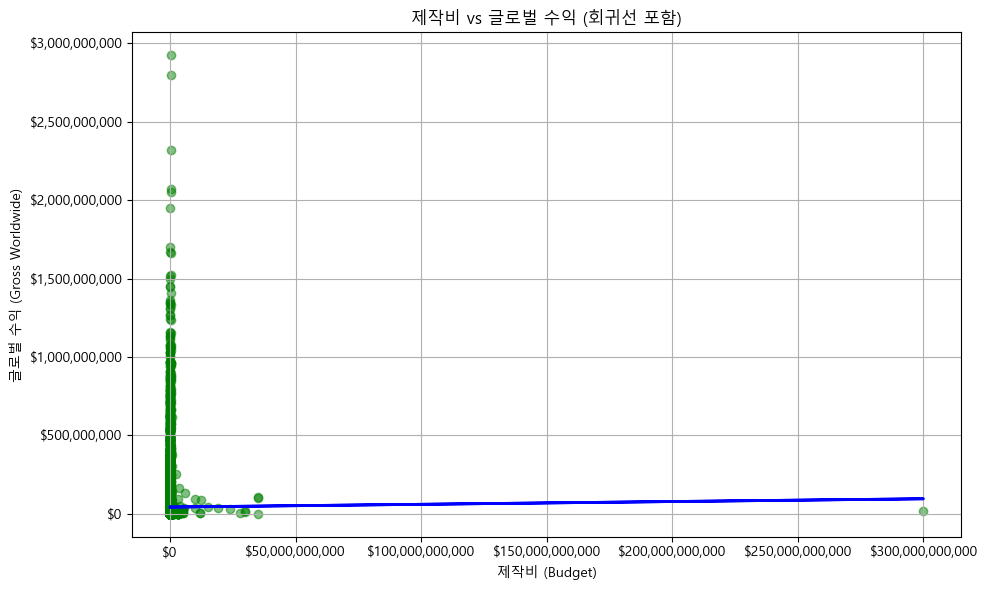

In [252]:

# 산점도 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['grossWorldWide'], alpha=0.5, color='g')

# 회귀선 추가
X = df['budget'].values.reshape(-1, 1)
y = df['grossWorldWide'].values
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

plt.plot(X, y_pred, color='b', linewidth=2)

# 천 단위 구분 및 통화 기호 추가
def currency(x, pos):
    return f"${x:,.0f}"

# X축과 Y축에 천 단위 구분과 통화 기호 적용
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

plt.xlabel('제작비 (Budget)')
plt.ylabel('글로벌 수익 (Gross Worldwide)')
plt.title('제작비 vs 글로벌 수익 (회귀선 포함)')
plt.grid(True)
plt.tight_layout()
plt.show()


### **데이터 전처리 주요 포인트**

- 결측값 처리 (예: 제작비, 수익, 평점)
- 연속형 변수(예: Budget, GrossWorldwide)의 로그 변환으로 분포 조정
- 감독, 배우 등 다중 텍스트 데이터를 리스트 형태로 처리
- 장르, 언어 등 범주형 변수의 One-hot Encoding 또는 Label Encoding
